In [4]:
!pip install matplotlib pandas

Продукт принес наибольшую выручку : ('печенье', 1173) 
День c наибольшей суммой продаж.('2024-06-20', 698)


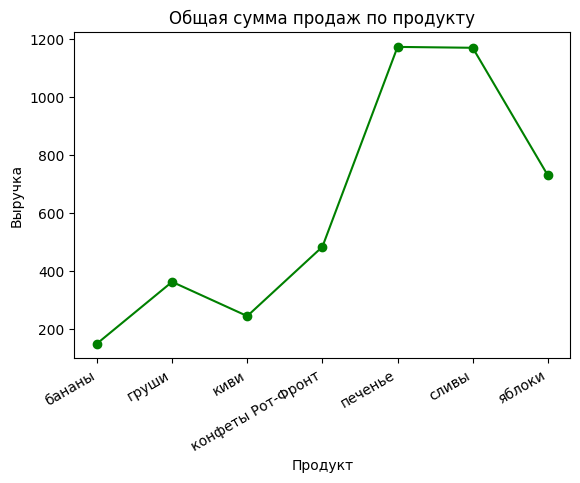

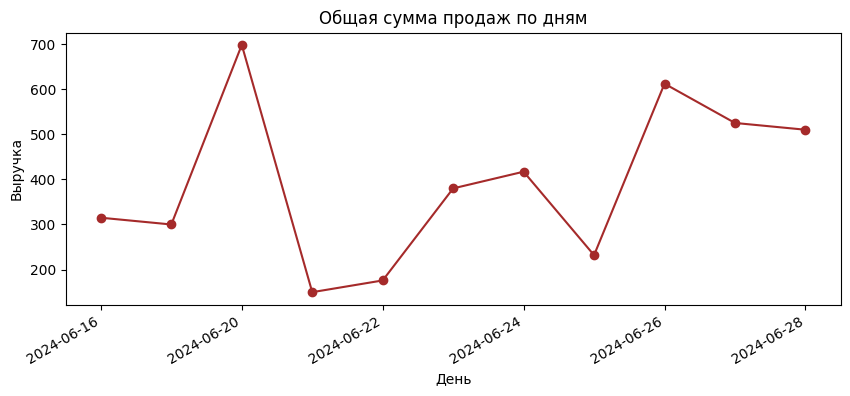

In [4]:
import pandas as pd
from matplotlib import pyplot as plt


def read_sales_data(file_path):
    "читает sales.csv построчно, каждую строку разбивает по , на словари, отдавая list словарей"

    # читаем файл построчно в переменную download
    with open(file_path, "r", encoding='utf-8') as f:
        download = f.readlines()
    result = []
    # иттеративно проходим по строкам файла(со второй строки), записываем словари по каждому аттрибуту в словарь,
    # предварительно разделя строку по ","
    dict1, dict2, dict3, dict4 = {}, {}, {}, {}
    for i in range(1, len(download)):
        dict1["product_name"] = download[i].split(",")[0]
        dict2["quantity"] = download[i].split(",")[1]
        dict3["price"] = download[i].split(",")[2]
        dict4["date"] = download[i].split(",")[3]
        result.append([dict1, dict2, dict3, dict4])
        dict1, dict2, dict3, dict4 = {}, {}, {}, {}
    return result


def total_sales_per_product(sales_data):
    """Принимает список продаж и возвращает словарь, где ключ - дата,
    а значение общая сумма продаж за эту дату."""

    # преобразуем в список списков каждый день продаж, предварительно подсчитывая сумму продаж
    sum_to_product = []
    for i in range(0, len(sales_data)):
        p_name = sales_data[i][0].get("product_name").split("\n")[0]
        p_price = sales_data[i][2].get("price")
        p_quant = sales_data[i][1].get("quantity")
        sum_to_product.append([p_name, int(p_price) * int(p_quant)])

    # создаем df из полученного выше списка
    df = pd.DataFrame(sum_to_product, columns=["product_name", "sum_sales"])

    # группируем по дате
    sum_to_product_df = df.groupby('product_name', as_index=False) \
        .agg({'sum_sales': 'sum'}) \
        .sort_values("sum_sales")

    # иттеративно проходя по каждой строке df записываем данные в словарь
    dict_sum_on_product = {}
    for i in sum_to_product_df.index:
        dict_sum_on_product[sum_to_product_df.loc[i]["product_name"]] = int(sum_to_product_df.loc[i]["sum_sales"])

    return dict_sum_on_product


def sales_over_time(sales_data):
    """Принимает список продаж и возвращает словарь, где ключ - дата,
    а значение общая сумма продаж за эту дату."""

    # преобразуем в список списков каждый день продаж, предварительно подсчитывая сумму продаж
    sum_to_date = []
    for i in range(0, len(sales_data)):
        p_price = sales_data[i][2].get("price")
        p_quant = sales_data[i][1].get("quantity")
        date_p = sales_data[i][3].get("date").split("\n")[0]
        sum_to_date.append([date_p, int(p_price) * int(p_quant)])

    # создаем df из полученного выше списка
    df = pd.DataFrame(sum_to_date, columns=["date", "sum_sales"])

    # группируем по дате
    sum_to_date_df = df.groupby('date', as_index=False) \
        .agg({'sum_sales': 'sum'}) \
        .sort_values("sum_sales")

    # найти строку с max значением pandas df
    # max_date_value = list(sum_to_date_df.loc[sum_to_date_df['sum_sales'].idxmax()])
    # return list(max_date_value)

    # иттеративно проходя по каждой строке df записываем данные в словарь
    dict_sum_on_date = {}
    for i in sum_to_date_df.index:
        dict_sum_on_date[sum_to_date_df.loc[i]["date"]] = int(sum_to_date_df.loc[i]["sum_sales"])

    return dict_sum_on_date


def show_plt_sales_date(sales_data):
    "выводит график по продажам по дате"
    sum_to_date = []
    for i in range(0, len(sales_data)):
        p_price = sales_data[i][2].get("price")
        p_quant = sales_data[i][1].get("quantity")
        date_p = sales_data[i][3].get("date").split("\n")[0]
        sum_to_date.append([date_p, int(p_price) * int(p_quant)])

    fig, axs = plt.subplots(1, 1)
    # создаем df из полученного выше списка
    df = pd.DataFrame(sum_to_date, columns=["date", "sum_sales"])
    plt.rcParams['figure.figsize'] = [10, 4]
    df.groupby('date')['sum_sales'].sum().plot(marker='o', linestyle='-', color='brown')
    plt.title('Общая сумма продаж по дням')
    plt.xlabel('День')
    plt.ylabel('Выручка')
    plt.gcf().autofmt_xdate()


def show_plt_sales_product(sales_data):
    "выводит график по продажам продуктов"
    # преобразуем в список списков каждый день продаж, предварительно подсчитывая сумму продаж
    sum_to_product = []
    for i in range(0, len(sales_data)):
        p_name = sales_data[i][0].get("product_name").split("\n")[0]
        p_price = sales_data[i][2].get("price")
        p_quant = sales_data[i][1].get("quantity")
        sum_to_product.append([p_name, int(p_price) * int(p_quant)])

    # создаем df из полученного выше списка
    df = pd.DataFrame(sum_to_product, columns=["product_name", "sum_sales"])

    fig, axs = plt.subplots(1, 1)
    plt.rcParams['figure.figsize'] = [10, 4]
    df.groupby('product_name')['sum_sales'].sum().plot(marker='o', linestyle='-', color='green')
    plt.title('Общая сумма продаж по продукту')
    plt.xlabel('Продукт')
    plt.ylabel('Выручка')
    plt.gcf().autofmt_xdate()


sales_data = read_sales_data("sales.csv")
print(f"Продукт принес наибольшую выручку : {list(total_sales_per_product(sales_data).items())[-1]} ")
show_plt_sales_product(sales_data)
print(f"День c наибольшей суммой продаж.{list(sales_over_time(sales_data).items())[-1]}")
show_plt_sales_date(sales_data)
